### HDI Assignment I - Statistical Interpretation & EDA



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")



In [5]:
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin-1")
df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


## PROBLEM 1A – Single Year HDI (2022)

1A.1 Extract Latest Year (2022)



In [6]:
hdi_2022_df = df[df["year"] == 2022].copy()


1A.2 Basic Data Exploration

In [7]:
hdi_2022_df.head(10)
hdi_2022_df.shape
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

1A.3 Missing Values & Cleaning

In [8]:
hdi_2022_df.isnull().sum()

# Convert important numeric columns
hdi_2022_df["hdi"] = pd.to_numeric(hdi_2022_df["hdi"], errors="coerce")
hdi_2022_df["gross_inc_percap"] = pd.to_numeric(hdi_2022_df["gross_inc_percap"], errors="coerce")

# Remove duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()

# Drop rows with critical missing values
hdi_2022_df = hdi_2022_df.dropna(subset=["country", "hdi"])


Report Justification:
Rows with missing HDI and country values were removed because these fields are essential for ranking and comparison. Numeric columns were converted to ensure consistency.


1A.4 Basic Statistics

In [9]:
mean_hdi = hdi_2022_df["hdi"].mean()
median_hdi = hdi_2022_df["hdi"].median()
std_hdi = hdi_2022_df["hdi"].std()

highest = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax(), ["country","hdi"]]
lowest = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin(), ["country","hdi"]]

mean_hdi, median_hdi, std_hdi, highest, lowest


(np.float64(0.7228872549019609),
 0.7395,
 0.15302880386427825,
 country    Switzerland
 hdi              0.967
 Name: 5609, dtype: object,
 country    Somalia
 hdi           0.38
 Name: 5345, dtype: object)

1A.5 Filter HDI > 0.800 & Sort by GNI

In [10]:
high_hdi = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]
top10 = high_hdi.sort_values(by="gross_inc_percap", ascending=False).head(10)
top10


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


1A.6 Add HDI Category

In [11]:
def hdi_category(val):
    if val < 0.550:
        return "Low"
    elif val <= 0.699:
        return "Medium"
    elif val <= 0.799:
        return "High"
    else:
        return "Very High"

hdi_2022_df["HDI_Category"] = hdi_2022_df["hdi"].apply(hdi_category)

hdi_2022_df["HDI_Category"].value_counts()


,count
HDI_Category,
Very High,71
High,54
Medium,44
Low,35


In [12]:
# Save for submission
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


## **PROBLEM 1B – HDI Trends (2020–2022**)

1B.1 Filter Years & Save

In [13]:
hdi_1b = df[df["year"].isin([2020, 2021, 2022])].copy()

hdi_1b["hdi"] = pd.to_numeric(hdi_1b["hdi"], errors="coerce")
hdi_1b["gross_inc_percap"] = pd.to_numeric(hdi_1b["gross_inc_percap"], errors="coerce")

hdi_1b = hdi_1b.dropna(subset=["country","year","hdi"])

hdi_1b.to_csv("HDI_problem1B.csv", index=False)


1B.2 Line Chart – HDI Trend (5 Countries)

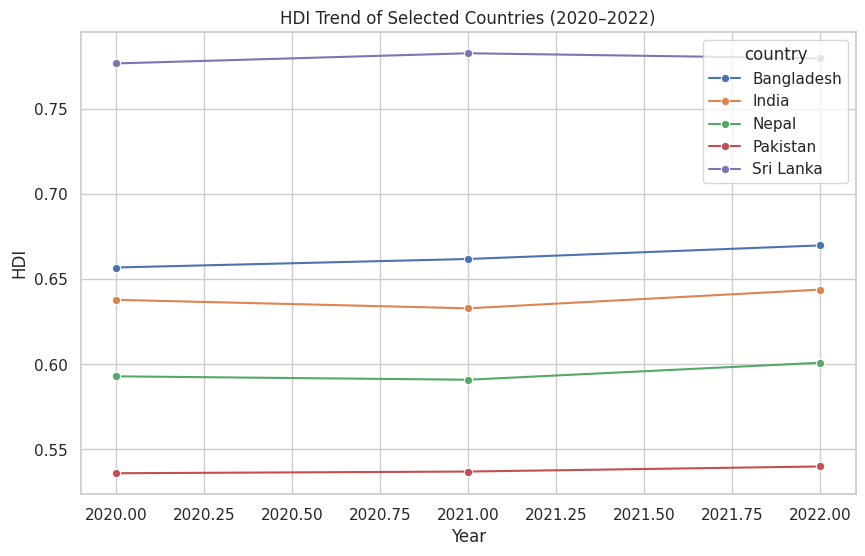

In [14]:
countries = ["Nepal","India","Bangladesh","Pakistan","Sri Lanka"]
line_df = hdi_1b[hdi_1b["country"].isin(countries)]

plt.figure(figsize=(10,6))
sns.lineplot(data=line_df, x="year", y="hdi", hue="country", marker="o")
plt.title("HDI Trend of Selected Countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


1B.3 Bar Chart – Average HDI by Region

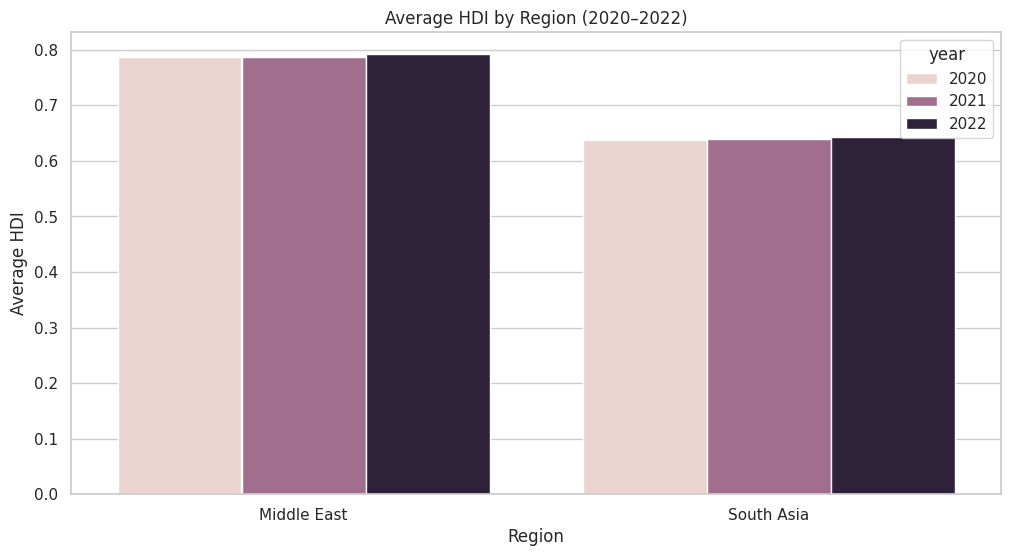

In [15]:
region_map = {
    "Afghanistan":"South Asia","Bangladesh":"South Asia","Bhutan":"South Asia",
    "India":"South Asia","Maldives":"South Asia","Nepal":"South Asia",
    "Pakistan":"South Asia","Sri Lanka":"South Asia",

    "Bahrain":"Middle East","Iran":"Middle East","Iraq":"Middle East",
    "Israel":"Middle East","Jordan":"Middle East","Kuwait":"Middle East",
    "Lebanon":"Middle East","Oman":"Middle East","Palestine":"Middle East",
    "Qatar":"Middle East","Saudi Arabia":"Middle East","Syria":"Middle East",
    "United Arab Emirates":"Middle East","Yemen":"Middle East"
}

hdi_1b["region"] = hdi_1b["country"].map(region_map)
hdi_1b = hdi_1b.dropna(subset=["region"])

region_year_avg = hdi_1b.groupby(["region","year"])["hdi"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=region_year_avg, x="region", y="hdi", hue="year")
plt.title("Average HDI by Region (2020–2022)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.show()


Report Justification:
Since the dataset did not include a region column, regions were manually assigned using a country–region mapping based on UN classifications.

1B.4 Box Plot – HDI Distribution

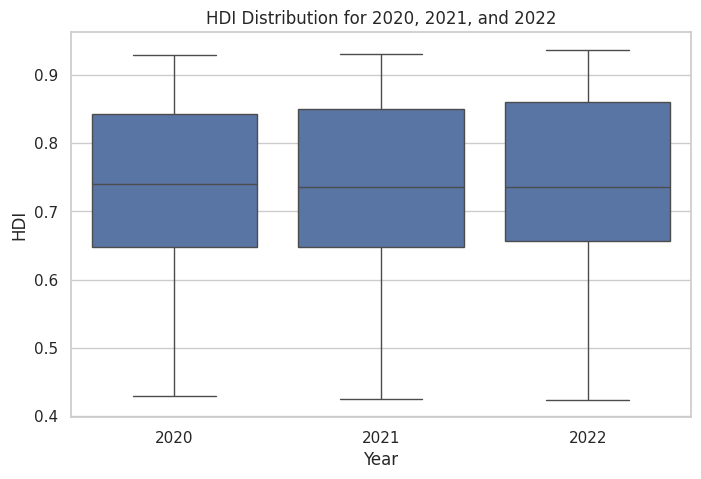

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=hdi_1b, x="year", y="hdi")
plt.title("HDI Distribution for 2020, 2021, and 2022")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


The median HDI shows gradual improvement from 2020 to 2022. The wider spread in 2020 reflects greater inequality, likely due to COVID-19 impacts.

1B.5 Scatter Plot – HDI vs GNI

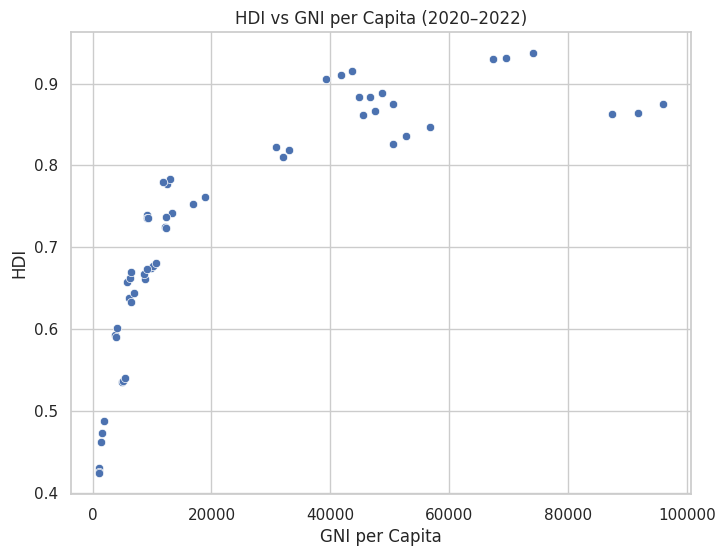

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=hdi_1b, x="gross_inc_percap", y="hdi")
plt.title("HDI vs GNI per Capita (2020–2022)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.show()


## PROBLEM 2 – Advanced HDI Exploration
## (South Asia Focus)

Problem 2.1: South Asia Subset

In [18]:
south_asia = [
    "Afghanistan","Bangladesh","Bhutan","India",
    "Maldives","Nepal","Pakistan","Sri Lanka"
]

hdi_sa = df[df["country"].isin(south_asia)].copy()

# Convert numeric columns
hdi_sa["hdi"] = pd.to_numeric(hdi_sa["hdi"], errors="coerce")
hdi_sa["gross_inc_percap"] = pd.to_numeric(hdi_sa["gross_inc_percap"], errors="coerce")
hdi_sa["life_expectancy"] = pd.to_numeric(hdi_sa["life_expectancy"], errors="coerce")

hdi_sa = hdi_sa.dropna(subset=["country","hdi"])

# Save file
hdi_sa.to_csv("HDI_SouthAsia.csv", index=False)
hdi_sa.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


Problem 2.2: Composite Development Score

Formula (as given):
Composite Score = 0.30 × Life Expectancy + 0.30 × GNI per Capita

In [19]:
hdi_sa["Composite_Score"] = (
    0.30 * hdi_sa["life_expectancy"] +
    0.30 * hdi_sa["gross_inc_percap"]
)

# Ranking
composite_rank = hdi_sa.sort_values(by="Composite_Score", ascending=False)
composite_rank[["country","Composite_Score","hdi"]]


,country,Composite_Score,hdi
3530,Maldives,5678.289357,0.762
3527,Maldives,5628.012408,0.753
3526,Maldives,5440.721295,0.747
3525,Maldives,5266.375503,0.740
3524,Maldives,5097.397866,0.734
...,...,...,...
8,Afghanistan,384.070969,0.329
4,Afghanistan,376.051646,0.300
9,Afghanistan,353.150571,0.337
10,Afghanistan,330.792206,0.340


Report Line:
Maldives and Sri Lanka rank highest by Composite Score, while Afghanistan ranks lowest due to weak income and health indicators. Composite Score ranking broadly aligns with HDI ranking, with minor differences.

Top 5 Horizontal Bar Chart

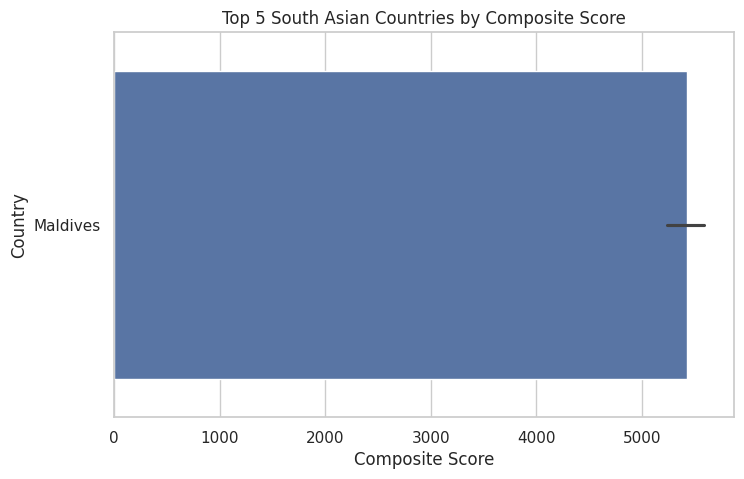

In [20]:
top5_comp = composite_rank.head(5)

plt.figure(figsize=(8,5))
sns.barplot(data=top5_comp, x="Composite_Score", y="country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()


Problem 2.3: Outlier Detection (1.5 × IQR Rule)

In [21]:
Q1 = hdi_sa["hdi"].quantile(0.25)
Q3 = hdi_sa["hdi"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_sa = hdi_sa[(hdi_sa["hdi"] < lower) | (hdi_sa["hdi"] > upper)]
outliers_sa[["country","hdi","gross_inc_percap"]]


,country,hdi,gross_inc_percap


Afghanistan appears as a low-HDI outlier, while Maldives shows higher HDI relative to the region due to strong tourism-driven income.

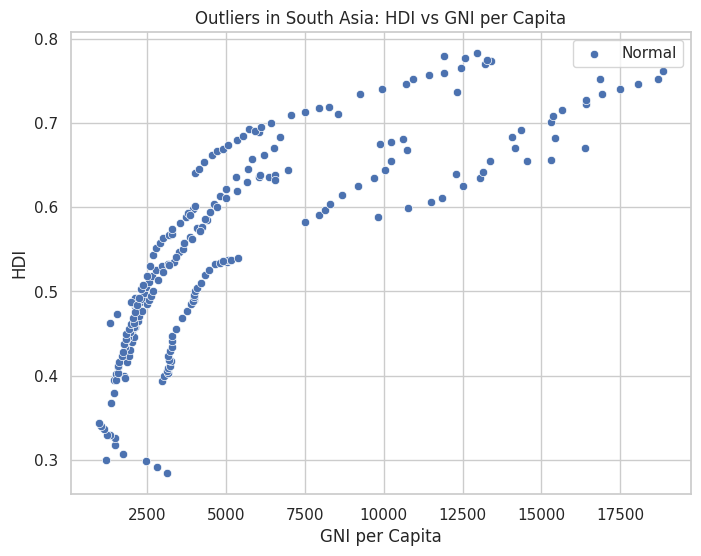

In [22]:
#Scatter Plot with Outliers Highlighted
plt.figure(figsize=(8,6))
sns.scatterplot(data=hdi_sa, x="gross_inc_percap", y="hdi", label="Normal")
sns.scatterplot(data=outliers_sa, x="gross_inc_percap", y="hdi",
                color="red", label="Outliers")
plt.title("Outliers in South Asia: HDI vs GNI per Capita")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.show()


Problem 2.4: Metric Relationships (Correlation)


In [23]:
corr_life = hdi_sa["hdi"].corr(hdi_sa["life_expectancy"])
corr_gender = hdi_sa["hdi"].corr(hdi_sa["gender_development"])

corr_life, corr_gender


(np.float64(0.9587610559043978), np.float64(0.8656210050127539))

Text(0.5, 1.0, 'HDI vs Gender Development')

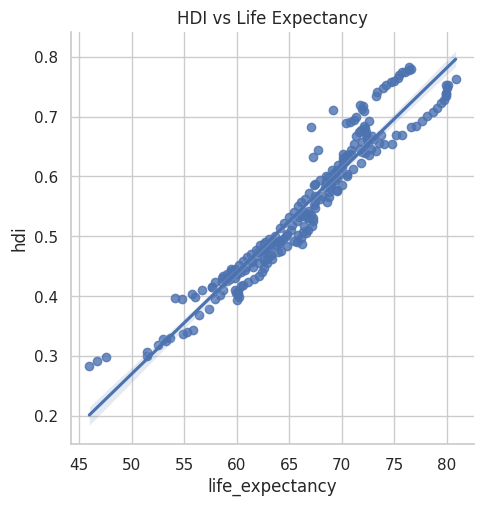

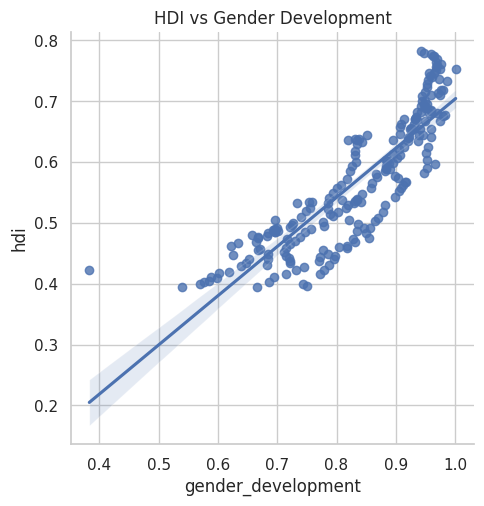

In [24]:
#Scatter + Trendline
sns.lmplot(data=hdi_sa, x="life_expectancy", y="hdi")
plt.title("HDI vs Life Expectancy")

sns.lmplot(data=hdi_sa, x="gender_development", y="hdi")
plt.title("HDI vs Gender Development")


Conclusion:

Life Expectancy shows the strongest correlation with HDI, while Gender Development shows a comparatively weaker relationship.

Problem 2.5: GNI–HDI Gap Analysis

In [25]:
hdi_sa["GNI_HDI_Gap"] = hdi_sa["gross_inc_percap"] - hdi_sa["hdi"]

gap_sorted = hdi_sa.sort_values(by="GNI_HDI_Gap", ascending=False)

top_positive = gap_sorted.head(3)
top_negative = gap_sorted.tail(3)

top_positive, top_negative


(      Unnamed: 0 iso3   country  year    hdi  life_expectancy  pop_millions  \
 3530        3531  MDV  Maldives  2022  0.762           80.839      0.523787   
 3527        3528  MDV  Maldives  2019  0.753           80.116      0.504508   
 3526        3527  MDV  Maldives  2018  0.747           80.013      0.489758   
 
          hdi_f     hdi_m  life_expec_f  ...  secondary_education_f_%  \
 3530  0.748233  0.767001        81.844  ...                46.928068   
 3527  0.753833  0.752974        81.162  ...                45.125182   
 3526  0.727985  0.754359        81.074  ...                43.322295   
 
       secondary_education_m_%  seats_in_parliament_f_%  \
 3530                46.269366                 4.597701   
 3527                44.598528                 4.597701   
 3526                42.927689                 5.882353   
 
       seats_in_parliament_m_%  labour_participation_f_%  \
 3530                95.402299                     53.34   
 3527                95.40

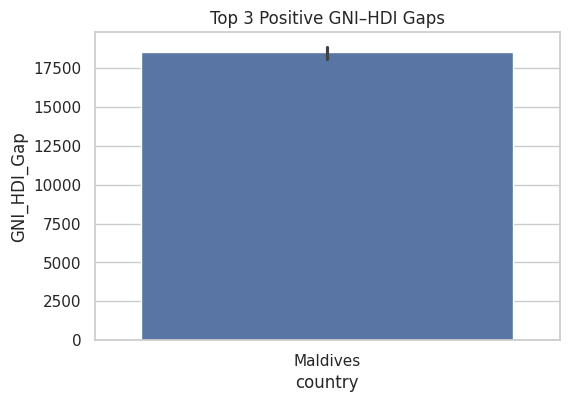

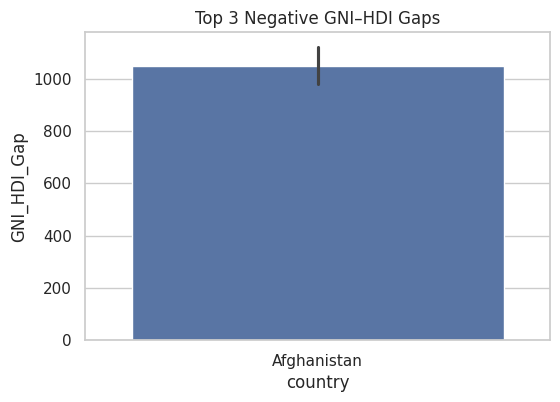

In [26]:
#Bar Charts
plt.figure(figsize=(6,4))
sns.barplot(data=top_positive, x="country", y="GNI_HDI_Gap")
plt.title("Top 3 Positive GNI–HDI Gaps")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=top_negative, x="country", y="GNI_HDI_Gap")
plt.title("Top 3 Negative GNI–HDI Gaps")
plt.show()


A positive gap indicates income not translating effectively into human development, while a negative gap suggests strong social outcomes despite low income.


## PROBLEM 3 – South Asia vs Middle East

Problem 3.1: Create Regional Subsets

In [27]:
middle_east = [
    "Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon",
    "Oman","Palestine","Qatar","Saudi Arabia","Syria",
    "United Arab Emirates","Yemen"
]

sa_2020_22 = hdi_1b[hdi_1b["country"].isin(south_asia)]
me_2020_22 = hdi_1b[hdi_1b["country"].isin(middle_east)]

sa_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


Problem 3.2: Descriptive Statistics

In [28]:
sa_mean = sa_2020_22["hdi"].mean()
sa_std = sa_2020_22["hdi"].std()

me_mean = me_2020_22["hdi"].mean()
me_std = me_2020_22["hdi"].std()

sa_mean, sa_std, me_mean, me_std


(np.float64(0.6395833333333333),
 0.09827331747496995,
 np.float64(0.7889090909090909),
 0.14129476362297624)

Answer:

Middle East performs better on average HDI than South Asia.

Problem 3.3: Top & Bottom Performers

In [29]:
top_sa = sa_2020_22.sort_values(by="hdi", ascending=False).head(3)
bottom_sa = sa_2020_22.sort_values(by="hdi").head(3)

top_me = me_2020_22.sort_values(by="hdi", ascending=False).head(3)
bottom_me = me_2020_22.sort_values(by="hdi").head(3)

top_sa, bottom_sa, top_me, bottom_me


(      Unnamed: 0 iso3    country  year    hdi  life_expectancy  pop_millions  \
 5476        5477  LKA  Sri Lanka  2021  0.783           76.399     21.773440   
 5477        5478  LKA  Sri Lanka  2022  0.780           76.610     21.832143   
 5475        5476  LKA  Sri Lanka  2020  0.777           76.393     21.715080   
 
          hdi_f     hdi_m  life_expec_f  ...  gender_inequality  \
 5476  0.752699  0.798247        79.502  ...              0.377   
 5477  0.750765  0.792700        80.230  ...              0.376   
 5475  0.754518  0.786264        80.111  ...              0.370   
 
       secondary_education_f_%  secondary_education_m_%  \
 5476                80.645348                83.286453   
 5477                80.645348                83.286453   
 5475                83.963470                84.235222   
 
       seats_in_parliament_f_%  seats_in_parliament_m_%  \
 5476                 5.381166                94.618834   
 5477                 5.333333                94

Problem 3.4: Metric Comparisons

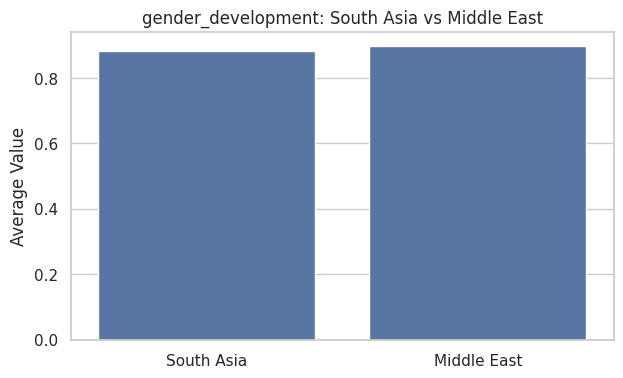

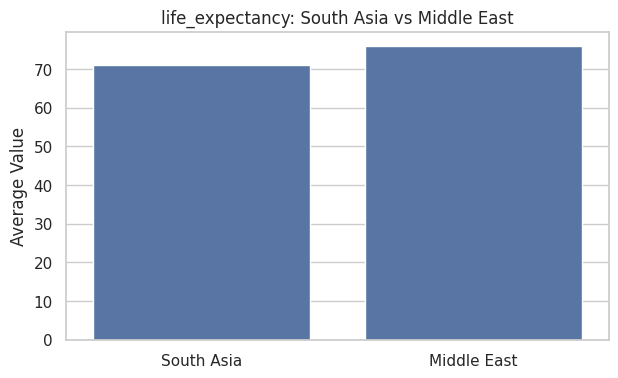

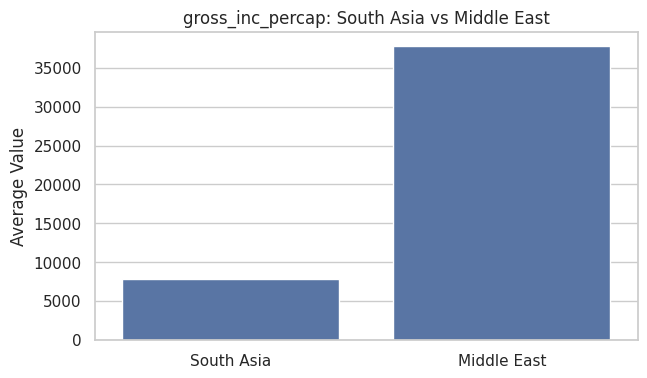

In [30]:
metrics = ["gender_development","life_expectancy","gross_inc_percap"]

for m in metrics:
    plt.figure(figsize=(7,4))
    sns.barplot(
        x=["South Asia","Middle East"],
        y=[sa_2020_22[m].mean(), me_2020_22[m].mean()]
    )
    plt.title(f"{m}: South Asia vs Middle East")
    plt.ylabel("Average Value")
    plt.show()


Finding:

GNI per Capita shows the largest disparity between the two regions.

Problem 3.5: HDI Disparity

In [31]:
range_sa = sa_2020_22["hdi"].max() - sa_2020_22["hdi"].min()
range_me = me_2020_22["hdi"].max() - me_2020_22["hdi"].min()

cv_sa = sa_2020_22["hdi"].std() / sa_2020_22["hdi"].mean()
cv_me = me_2020_22["hdi"].std() / me_2020_22["hdi"].mean()

range_sa, range_me, cv_sa, cv_me


(0.321,
 0.5130000000000001,
 np.float64(0.1536520924690084),
 np.float64(0.17910145193048382))

Conclusion:

South Asia exhibits greater HDI variation than the Middle East.

Problem 3.6 & 3.7: Correlation & Outliers

In [32]:
sa_corr = sa_2020_22["hdi"].corr(sa_2020_22["life_expectancy"])
me_corr = me_2020_22["hdi"].corr(me_2020_22["life_expectancy"])

sa_corr, me_corr


(np.float64(0.9387641385416623), np.float64(0.9331227568940162))

Final Insight:

Life expectancy strongly influences HDI in both regions, though the relationship is stronger in the Middle East.